<a href="https://colab.research.google.com/github/linnea-backgard/ai-ml-principles-exercises/blob/main/ML-training/cv-crash-course/digit_classification_sklearn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import sklearn
import numpy as np

In [20]:
import sklearn.datasets as datasets
from PIL import Image

In [4]:
data = datasets.load_digits()

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

5


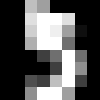

In [32]:
i = 5
print(data.target[i])
Image.fromarray((data.images[i]/16 * 255).astype(np.uint8), "L").resize((100, 100), resample = Image.NEAREST)

In [11]:
data.target[0]

0

In [33]:

np.max(data.images)

16.0

In [38]:
data.images.reshape((len(data.images), -1)).shape

(1797, 64)

# Train a model

* Perform a dataset split into training data and test data 
* Train an SVM classifier
* Evaluate the classifier

In [35]:
256 ** (8*8)

13407807929942597099574024998205846127479365820592393377723561443721764030073546976801874298166903427690031858186486050853753882811946569946433649006084096

In [36]:
from sklearn.model_selection import train_test_split

In [39]:
flat_dataset = data.images.reshape((len(data.images), -1))
x_train, x_test, y_train, y_test = train_test_split(flat_dataset, data.target, train_size=0.8)

In [40]:
x_train.shape

(1437, 64)

In [41]:
x_test.shape

(360, 64)

3


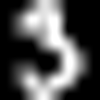

In [50]:
print(y_test[0])
Image.fromarray((x_test[0].reshape((8,8)) / 16 * 255).astype(np.uint8), "L").resize((100,100))

In [51]:
from sklearn import svm

In [52]:
model = svm.SVC(gamma=0.001)
model.fit(x_train, y_train)


SVC(gamma=0.001)

In [58]:
model.predict(x_test[0:10])


array([3, 2, 0, 3, 7, 7, 2, 2, 2, 3])

In [57]:

y_test[0:10]

array([3, 2, 0, 3, 7, 7, 2, 2, 2, 3])

In [61]:
from sklearn import metrics

In [64]:
predicted = model.predict(x_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.98      1.00      0.99        52
           2       1.00      1.00      1.00        41
           3       0.98      1.00      0.99        43
           4       1.00      0.97      0.99        34
           5       0.97      1.00      0.99        34
           6       1.00      1.00      1.00        33
           7       0.97      1.00      0.99        33
           8       1.00      0.97      0.99        34
           9       1.00      0.94      0.97        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



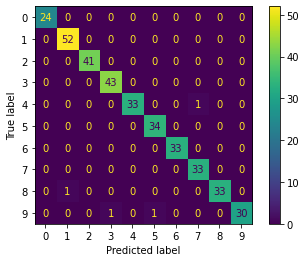

In [65]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)